In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

### **Exercícios**

**1 - Os projetistas de um banco de dados para um sistema de informação querem desenvolver uma fórmula para prever o tempo gasto em uma operação de busca nos dados dos últimos X dias.  
O tempo real gasto foi medido para diferentes valores de X, conforme mostrado abaixo.  
Apresente uma fórmula e a sua avaliação para essa previsão.**

In [11]:
dados = pd.DataFrame({'dias':[1,2,4,8,16,25],'tempo':[0.65,0.79,1.36,2.26,3.59,5.36]})

In [12]:
dados

,dias,tempo
0,1,0.65
1,2,0.79
2,4,1.36
3,8,2.26
4,16,3.59
5,25,5.36


Coeficientes estimados:
b_0 = 0.5154210526315779 b_1 = 0.19495488721804516


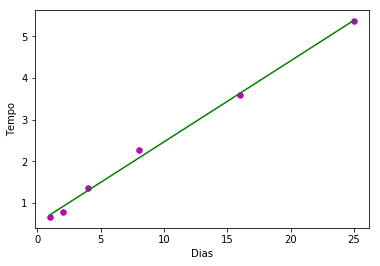

In [17]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    
    plt.scatter(x, y, color = "m",marker = "o", s = 30) 

    
    y_pred = b[0] + b[1]*x 

  
    plt.plot(x, y_pred, color = "g") 

 
    plt.xlabel('Dias') 
    plt.ylabel('Tempo') 

    plt.show() 

def main(): 
 
    x = dados.dias  
    y = dados.tempo  

    b = estimate_coef(x, y) 
    print("Coeficientes estimados:\nb_0 = {} b_1 = {}".format(b[0], b[1])) 

    
    plot_regression_line(x, y, b) 


main() 

tempo = 0.5154210526315779 +  0.19495488721804516*dias

In [15]:
dados['tempo_predito'] = 0.5154210526315779 + 0.19495488721804516*dados.dias

In [16]:
dados

,dias,tempo,tempo_predito
0,1,0.65,0.710376
1,2,0.79,0.905331
2,4,1.36,1.295241
3,8,2.26,2.075060
4,16,3.59,3.634699
5,25,5.36,5.389293


**2- Descreva as métricas de avaliação de desempenho de modelos: Recall e F1-score.  
Qual a vantagem sobre a acurácia e precisão?**

**3-  Utilize o dataset "weather_nominal.csv" disponível no moodle. Considere 70% das instâncias para treino e 30% para teste.  
Construa um modelo utilizando árvore de decisão para prever se uma pessoa vai jogar golf ou não.  
Qual o desempenho?  
Tente melhorar esse modelo e descreva como.**

In [33]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [34]:
df_raw = pd.read_csv('weather_nominal.csv')

In [35]:
df_raw.head()

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [36]:
from sklearn import preprocessing

le_outlook = preprocessing.LabelEncoder()
le_temperature = preprocessing.LabelEncoder()
le_humidity = preprocessing.LabelEncoder()
le_windy = preprocessing.LabelEncoder()
le_target = preprocessing.LabelEncoder()

In [37]:
le_outlook.fit(df_raw['Outlook'])

le_temperature.fit(df_raw['Temperature'])
le_humidity.fit(df_raw['Humidity'])
le_windy.fit(df_raw['Windy'])
le_target.fit(df_raw['Play golf'])
 

df_raw['Outlook']     = le_outlook.transform(df_raw['Outlook']) 
df_raw['Temperature'] = le_temperature.transform(df_raw['Temperature']) 
df_raw['Humidity']    = le_humidity.transform(df_raw['Humidity']) 
df_raw['Windy']       = le_windy.transform(df_raw['Windy']) 
df_raw['Play golf']   = le_target.transform(df_raw['Play golf']) 

In [38]:
df_raw.head()

,Outlook,Temperature,Humidity,Windy,Play golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [39]:
feature_cols = ['Outlook', 'Temperature', 'Humidity', 'Windy']
X = df_raw[feature_cols]
y = df_raw['Play golf']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [41]:
X_train.head()

,Outlook,Temperature,Humidity,Windy
30,0,1,0,0
36,1,1,0,1
33,0,2,0,1
28,1,2,1,1
4,2,0,1,0


In [42]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

In [43]:
y_pred = clf.predict(X_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8333333333333334
F1-Score: 0.8571428571428571


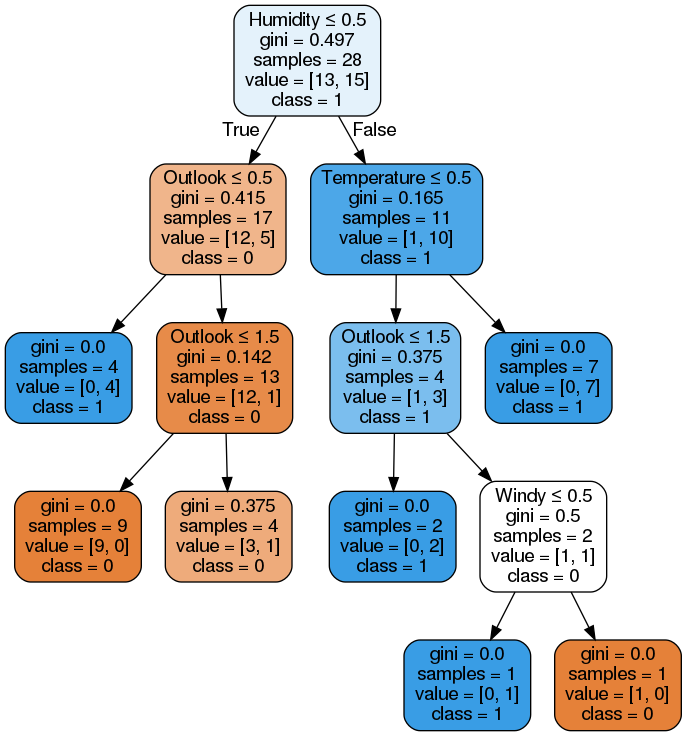

In [47]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('weather_nominal.png')
Image(graph.create_png())